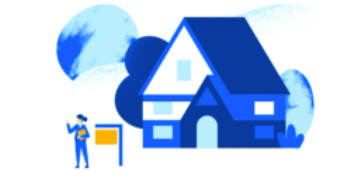

In [1]:
from imports import *

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Zillow 2017 Report: Identifying drivers of logerror

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Overview 
Buy a home? Rent a home? Sell a home? With just the click of a mouse you can enter a portal and (possibly) make a life changing decision. Zillow, founded in 2006, was created by former Microsoft executives Rich Barton and Lloyd Frink. It is my suspicion that one of them might have tripped over his wife’s stack of home and garden magazines and thought, ’I should put houses for sale online!’ Although I am probably wrong, it is fun to imagine the seed that started Zillow. For the fiscal year 2020, Zillow reported revenues of 3.4 billion dollars. Future homeowners, real estate agents, investors, and bored housewives alike flock to Zillow everyday to imagine a new life. Could we retire to Florida? How much does the home cost? How much could we sell our current home for? Does the new home have neighborhood amenities? How much are the property taxes? Is there an HOA? Zillow has made a name for itself in the housing market providing customers a wealth of information at their fingertips. Included in this information, is the industry exclusive Zillow ‘Zestimate’. A ‘Zestimate’ is Zillow’s published approximation of what a home is worth today. While it’s accuracy  fluctuates from city to city, Zillow claims the "nationwide median error rate for on-market homes is 1.9%." This project is dedicated to identifying the drivers of this error rate. This project includes all steps of the data science pipeline. 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Goal 
The goal of this project is to find key drivers of logerror for single unit properties with a transaction date of 2017. If any of these insights are new, Zillow can use them to create a better algorithm for more accurate Zestimates.

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Deliverables: 
- A final notebook 
- A README
- Wrangle.py 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Acquisition 
- Data was acquired from Codeup SQL Database: Zillow Table

In [2]:
df = wrangle_zillow.acquire()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Preparation 

- Filtered properties by propertylanduse desc to only include: 
    -Single Family Residential 
    -Mobile Home 
    -Manufactured
    -Modular 
    -Prefabricated Homes 
    -Residential General 
    -Townhouse 
- Dropped units over count 'one'
- Dropped all columns that had 50% or more missing values 
- Dropped columns: 
    - transactiondate: feature used to filter data, will not use in modeling 
    - parcelid: unique identifier, will not be useful for modeling 
    - unitcnt: only one value per row: 1; will not be useful for modeling 
    - id: unique identifier, will not be useful for modeling 
    - heatingorsystemdesc, buildingqualitytypeid, heatingorsystemtypeid, propertyzoningdesc, propertylandusedesc, propertycountylandusecode: over 20 percent null values - did not want to impute or drop null values
- Dropped all rows with null values: at this point all rows were missing less than 5% of the data 
- Created New Features: 
    - age: 2017 - yearbuilt 
    - logerror: absolute value of logerror
    - sqft_age: calculatedfinishedsquarefeet/age 
    - sqft_structuretax: calculatedfinishedsquarefeet/structuretaxvaluedollarcnt
    - Sqft_taxvalue: calculatedfinishedsquarefeet/taxvaluedollarcnt
    - Sqft_landtax: calculatedfinishedsquarefeet/landtaxvaluedollarcnt
    - Sqft_taxamount: calculatedfinishedsquarefeet/taxamount
    - age_structuretax: age/structuretaxvaluedollarcnt
    - age_taxvalue: age/taxvaluedollarcnt 
    - age_landtax: age/landtaxvaluedollarcnt
    - age_taxamount: age/taxamount
    - structuretax_taxvalue: structuretaxvaluecnt/taxvaluedollarcnt
    - structuretax_landtax: structuretaxvaluedollarcnt/landtaxvaluedollarcnt
    - Landtax_taxamount: landtaxvaluedollarcnt/taxamount
    - structuretax_taxamount: structuretaxvaluedollarcnt/ taxamount 
    - taxvalue_landtax: taxvaluedollarcnt/ landtaxvaluedollarcnt 
    - taxvalue_taxamount: taxvaluedollarcnt/ taxamount
- Started with (77380, 68) ended with (50616, 40)
- Retain 65% of data 

In [3]:
#prepare the data, includes all steps listed above 
df = wrangle_zillow.prepare_data(df)

In [4]:
#split the data
train, validate, test = wrangle_zillow.split_zillow_data(df)

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Exploration

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Exploration Questions 
- Is there a relationship between taxvalue_taxamount feature and logerror? 
- Is there a relationship between structuretax_taxamount feature and logerror? 
- Is there a relationship between Sqft_structuretax feature and logerror? 
- Is there a relationship between landtax_taxamount feature and logerror? 
- Is there a relationship between Structuretax_landtax and logerror? 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between taxvalue_taxamount feature and log error?

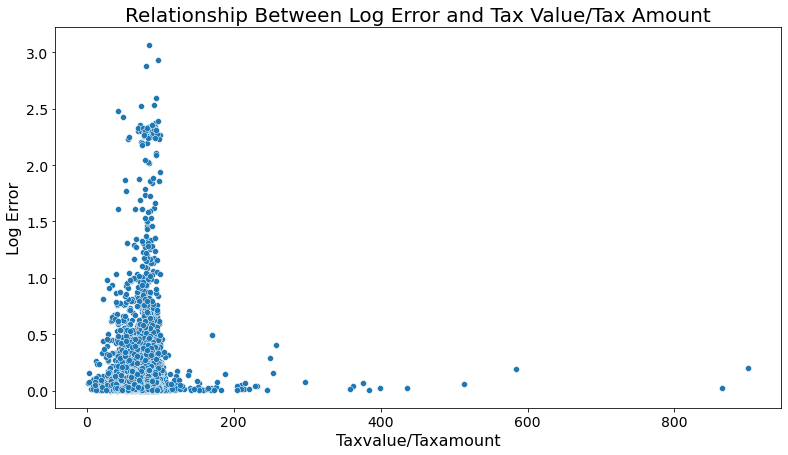

In [5]:
visuals.taxvalue_taxamount()

In [6]:
# H0 - There is no linear relationship between taxvalue_taxamount and logerror.
# H1 - There is a linear realtionship between taxvalue_taxamount and log error.
x = train.taxvalue_taxamount
y = train.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.018478104183107275
p = 0.0018687930049487945
We reject the H0.


### Key Takeaways: 
- There is evidence of a linear relationship between feature and target variable

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between structuretax_taxamount feature and logerror?

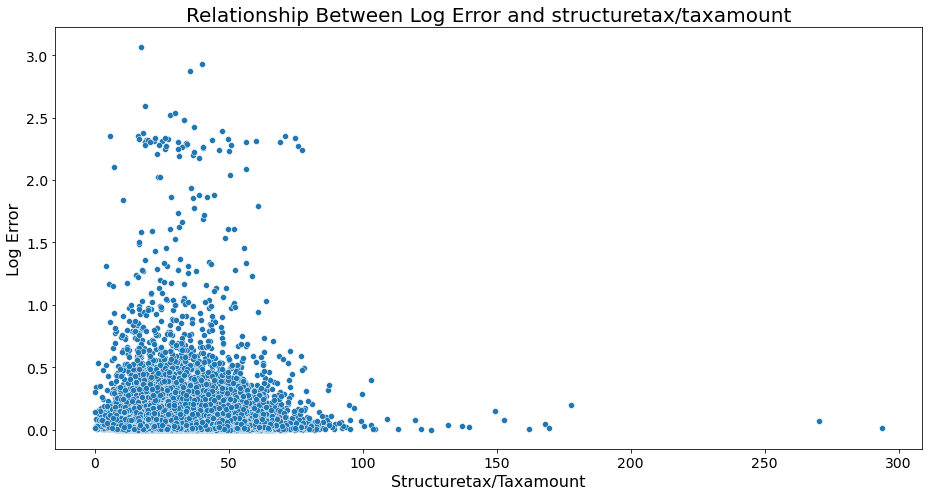

In [7]:
visuals.structuretax_taxamount()

<hr style="border-top: 2px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [8]:
# H0 - There is no linear relationship between structuretax_taxamount and logerror.
# H1 - There is a linear realtionship between structuretax_taxamount and log error.
α = 0.05
x = train.structuretax_taxamount
y = train.logerror
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.023277153849625875
p = 8.91662532138565e-05
We reject the H0.


### Key Takeaways: 
- There is evidence of a linear relationship between feature and target variable

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between Sqft_structuretax and logerror?

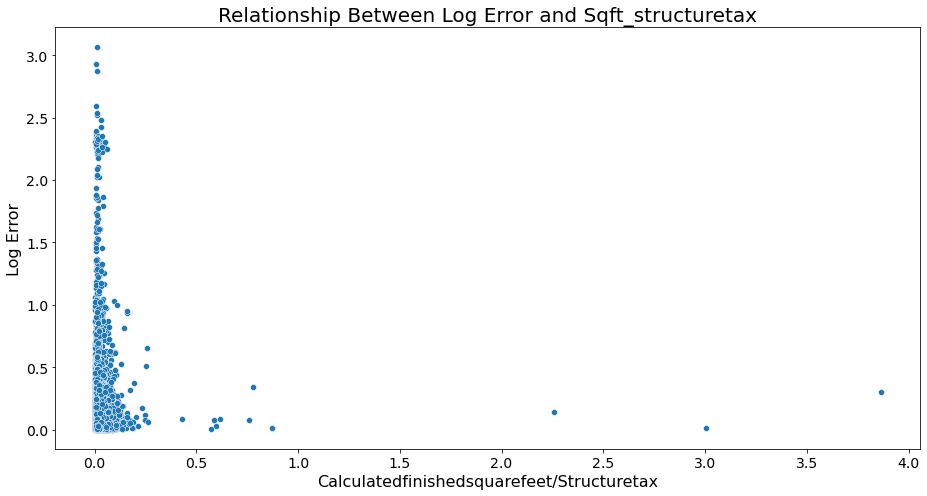

In [9]:
visuals.SquareFeet_StructureTax()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [10]:
# H0 - There is no linear relationship between Sqft_structuretax and logerror.
# H1 - There is a linear realtionship between Sqft_structuretax and logerror.
x = train.Sqft_structuretax
y = train.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.032934335905807396
p = 2.9444855230170447e-08
We reject the H0.


### Key Takeaways: 
- There is evidence of a linear relationship between feature and target variable

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between landtax_taxamount and logerror?

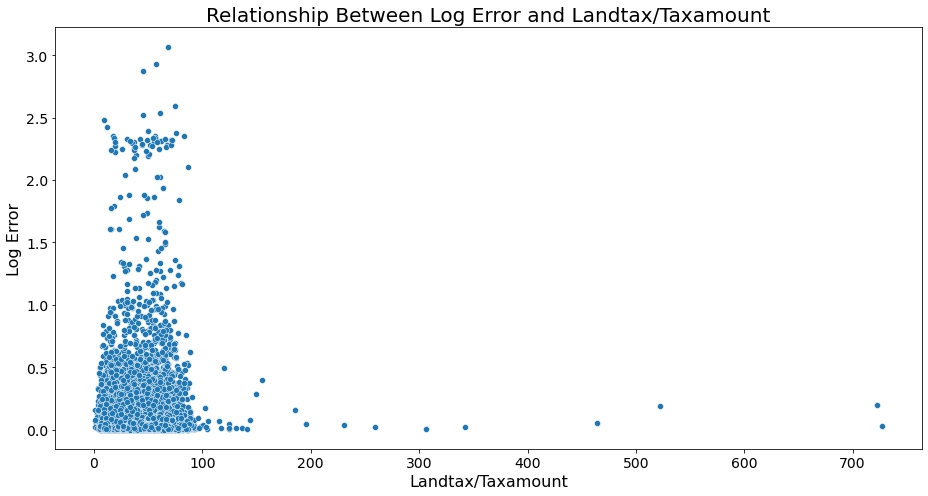

In [11]:
visuals.Landtax_Taxamount()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [12]:
# H0 - There is no linear relationship between Landtax_taxamount and logerror.
# H1 - There is a linear realtionship between Landtax_taxamount and logerror.
x = train.Landtax_taxamount
y = train.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.002142939765551663
p = 0.7183385587702065
We fail to reject the H0.


### Key Takeaway:

- There is no linear relationship between feature Landtax_taxamount and logerror 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between Structuretax_landtax and logerror?

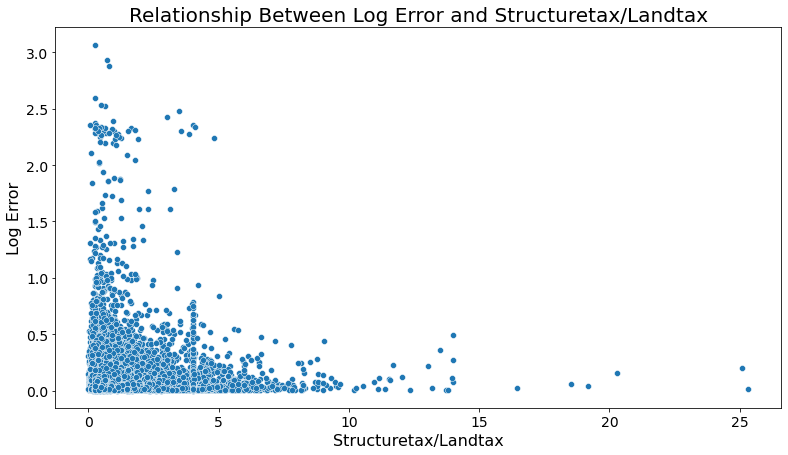

In [13]:
visuals.Structuretax_Landtax()

In [14]:
# H0 - There is no linear relationship between structuretax_landtax and logerror.
# H1 - There is a linear realtionship between structuretax_landtax and logerror.
x = train.Structuretax_landtax
y = train.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.00651906692448219
p = 0.27253625769753653
We fail to reject the H0.


### Key Takeaway:

- There is no linear relationship between structuretax_landtax and logerror.


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Exploration Summary:
- Is there a relationship between taxvalue_taxamount feature and logerror? 
    - There is evidence of a linear relationship between taxvalue_taxamount and log error
- Is there a relationship between structuretax_taxamount feature and logerror? 
    - There is evidence of a linear relationship between structuretax_taxamount and log error
- Is there a relationship between Sqft_structuretax feature and logerror? 
    - There is evidence of a linear relationship between Sqft_structuretax and log error
- Is there a relationship between landtax_taxamount feature and logerror?:
    - There is no linear relationship between landtax_taxamount and logerror.
- Is there a relationship between Structuretax_landtax and logerror? 
    - There is no linear relationship between structuretax_landtax and logerror.


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Set X and y for clustering and modeling 

In [15]:
target = "logerror"
columns = ['Structuretax_landtax', 'Landtax_taxamount', 'Sqft_structuretax', 'structuretax_taxamount', 'taxvalue_taxamount']

X_train = train[columns]
y_train = train[target]


X_validate = validate[columns]
y_validate = validate[target]


X_test = test[columns]
y_test = test[target]

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Clustering 


### Items to cluster on: 
- Structuretax_landtax
- Landtax_taxamount
- Sqft_structuretax


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Structure Tax and Land Tax Cluster 

In [16]:
#scale the data 
cluster_vars = ['Structuretax_landtax']
cluster_name = 'structuretax_landtax'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [18]:
train['structuretax_landtax_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

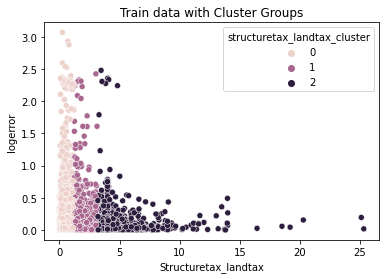

In [19]:
sns.scatterplot(x='Structuretax_landtax', y='logerror', hue='structuretax_landtax_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [20]:
train.groupby('structuretax_landtax_cluster')[ 'Structuretax_landtax', 'logerror'].median()

,Structuretax_landtax,logerror
structuretax_landtax_cluster,,
0,0.49,0.03
1,1.75,0.03
2,4.00,0.03


In [21]:
structure_landtax_0=train[train.structuretax_landtax_cluster == 0]
structure_landtax_1=train[train.structuretax_landtax_cluster == 1]
structure_landtax_2=train[train.structuretax_landtax_cluster == 2]

In [22]:
# H0 - There is no linear relationship between structure_landtax_0 and logerror.
# H1 - There is a linear realtionship between structure_landtax_0 and logerror.
x = structure_landtax_0.Structuretax_landtax
y = structure_landtax_0.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.012528297083629842
p = 0.0798828802350972
We fail to reject the H0.


In [23]:
# H0 - There is no linear relationship between structure_landtax_0 and logerror.
# H1 - There is a linear realtionship between structure_landtax_0 and logerror.
x = structure_landtax_1.Structuretax_landtax
y = structure_landtax_1.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.013019060863298633
p = 0.2888539700529312
We fail to reject the H0.


In [24]:
# H0 - There is no linear relationship between structure_landtax_0 and logerror.
# H1 - There is a linear realtionship between structure_landtax_0 and logerror.
x = structure_landtax_2.Structuretax_landtax
y = structure_landtax_2.logerror
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.026078796399213518
p = 0.2268761693364009
We fail to reject the H0.


### Key Takeaway: 
- There is no linear relationship between structure landtax clusters and logerror.

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Land Tax and Tax Amount Cluster

In [25]:
#scale the data 
cluster_vars = ['Landtax_taxamount']
cluster_name = 'Landtax_taxamount'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 0, 3, ..., 3, 0, 1], dtype=int32)

In [27]:
train['Landtax_taxamount_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

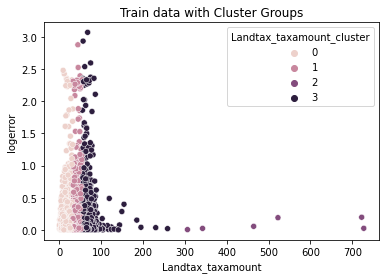

In [28]:
sns.scatterplot(x='Landtax_taxamount', y='logerror', hue='Landtax_taxamount_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [29]:
train.groupby('Landtax_taxamount_cluster')[ 'Landtax_taxamount', 'logerror'].median()

,Landtax_taxamount,logerror
Landtax_taxamount_cluster,,
0,21.40,0.03
1,44.42,0.03
2,493.42,0.04
3,64.41,0.03


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Square Feet and Structure Tax Cluster 

In [30]:
#scale the data 
cluster_vars = ['Sqft_structuretax']
cluster_name = 'Sqft_structureamount'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [32]:
train['Sqft_structuretax_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

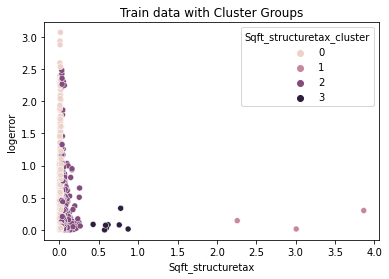

In [33]:
sns.scatterplot(x='Sqft_structuretax', y='logerror', hue='Sqft_structuretax_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [34]:
train.groupby('Sqft_structuretax_cluster')[ 'Sqft_structuretax', 'logerror'].median()

,Sqft_structuretax,logerror
Sqft_structuretax_cluster,,
0,0.01,0.03
1,3.01,0.14
2,0.04,0.04
3,0.61,0.08


In [35]:
Sqft_structuretax_0=train[train.Sqft_structuretax_cluster == 'cluster_0']
Sqft_structuretax_1=train[train.Sqft_structuretax_cluster == 'cluster_1']
Sqft_structuretax_2=train[train.Sqft_structuretax_cluster == 'cluster_2']
Sqft_structuretax_3=train[train.Sqft_structuretax_cluster == 'cluster_3']

### Key Takeaway: 
- Sqft_structuretax had the widest variance of logerrors between the clusters 


<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling 

### Features used for modeling: 
    - Structuretax_landtax
    - Landtax_taxamount 
    - Sqft_structuretax
    - structuretax_taxamount
    - taxvalue_taxamount
    

### Metric Used For Evaluation: 
- I chose RMSE as my metric because: it is easy to interpret, it is expressed in units that are the same as the target variable, it describes the variance created when using the independent variables collectively to predict the target variable. 

### Baseline is set 

In [ ]:
baseline = y_train.median()
baseline

### First Model

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
#convert y_train y _ validate to df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [ ]:
#Create my X and y variables for quick reference 
X = X_train.copy()
y = y_train.copy()

In [ ]:
#Create A and B and C variables for quick reference 
A = X_validate.copy()
B = y_validate.copy()
C = y_test.copy()

In [ ]:
#Create a baseline 
baseline = y_train.median()
baseline

In [ ]:
#Create dataframe with target variable and my baseline 
df = pd.DataFrame(y)

In [ ]:
#Create dataframe with validate target variable 
df_validate = pd.DataFrame(B)

In [ ]:
#Create dataframe with test target variable 
df_test = pd.DataFrame(C)

In [ ]:
#add a column for baseline
df['baseline'] = 0.03

In [ ]:
#add a column for baseline residual, and baseline residual squared
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [ ]:
#Set the linear regression model 
lm = LinearRegression()

In [ ]:
#fit the model 
lm.fit(X_train, y_train)

In [ ]:
#print the coefficients 
lm.coef_[0]

In [ ]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [ ]:
#create predictions
predictions = lm.predict(X_train)

In [ ]:
#create a column for predictions
df['yhat'] = lm.predict(X_train)

In [ ]:
#create validate predictions
predictions_validate = lm.predict(X_validate)

In [ ]:
#create a column for validate predictions 
df_validate['pred_validate'] = predictions_validate

In [ ]:
#create test predictions 
predictions_test = lm.predict(X_test)

In [ ]:
#create a column for test predictions 
df_test['pred_test'] = predictions_test

In [ ]:
#calculate and print metrics 
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

In [ ]:
#calculate and print metrics 
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

In [ ]:
#calculate and print metrics 
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)
RMSE_test = sklearn.metrics.mean_squared_error(y_test, df_test.pred_test, squared = False )
print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)
print("RMSE TEST" ,RMSE_test)

### Second Model

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
#drop columns to create a new model 
X_train.drop(columns=['Landtax_taxamount'],inplace=True)

In [ ]:
#drop colmns to create a new model 
X_validate.drop(columns=['Landtax_taxamount'],inplace=True)

In [ ]:
#Create my X and y variables for quick reference 
#Create A and B variables for quick reference 
X = X_train.copy()
y = y_train.copy()
A = X_validate.copy()
B = y_validate.copy()

In [ ]:
#Create a baseline 
baseline = y_train.median()
baseline

In [ ]:
#Create dataframe with target variable and my baseline 
df = pd.DataFrame(y)
#Create dataframe with validate target variable 
df_validate = pd.DataFrame(B)
#add a column for baseline
df['baseline'] = 0.03
#add a column for baseline residual, and baseline residual squared
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [ ]:
#Set the linear regression model 
lm = LinearRegression()

In [ ]:
#fit the model 
lm.fit(X_train, y_train)

In [ ]:
#print the coefficients 
lm.coef_[0]

In [ ]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [ ]:
# create predictions
predictions = lm.predict(X_train)

In [ ]:
#create a column for predictions 
df['yhat'] = lm.predict(X_train)

In [ ]:
#create validate predictions
predictions_validate = lm.predict(X_validate)

In [ ]:
#create a column for validate predictions
df_validate['pred_validate'] = predictions_validate

In [ ]:
#calculate and print metrics 
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

In [ ]:
#calculate and print metrics 
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

In [ ]:
#calculate and print metrics 
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

### Third Model

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
#drop features for third model from X_train
X_train.drop(columns=['Sqft_structuretax'],inplace=True)

In [ ]:
#drop features for third model from X_validate 
X_validate.drop(columns=['Sqft_structuretax'],inplace=True)

In [ ]:
#Create my X and y variables for quick reference 
X = X_train.copy()
y = y_train.copy()
#Create A and B variables for quick reference 
A = X_validate.copy()
B = y_validate.copy()

In [ ]:
#create a baseline
baseline = y_train.median()
baseline

In [ ]:
#Create dataframe with target variable and my baseline 
df = pd.DataFrame(y)
#Create dataframe with validate target variable 
df_validate = pd.DataFrame(B)
#add a column for baseline
df['baseline'] = 0.03
#add a column for baseline residual, and baseline residual squared
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [ ]:
#Set the linear regression model 
lm = LinearRegression()

In [ ]:
#fit the model 
lm.fit(X_train, y_train)

In [ ]:
#print the coefficients 
lm.coef_[0]

In [ ]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [ ]:
#create predictions
predictions = lm.predict(X_train)

In [ ]:
#create a column for predictions 
df['yhat'] = lm.predict(X_train)

In [ ]:
#create validate predictions 
#create a column for validate predictions
predictions_validate = lm.predict(X_validate)
df_validate['pred_validate'] = predictions_validate

In [ ]:
#calculate and predict metrics 
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

In [ ]:
#calculate and predict metrics 
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

In [ ]:
#calculate and predict metrics 
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

### Fourth Model

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
#columns to drop before modeling 
X_train.drop(columns=['Structuretax_landtax'],inplace=True)

In [ ]:
#columns to drop before modeling 
X_validate.drop(columns=['Structuretax_landtax'],inplace=True)

In [ ]:
#Create my X and y variables for quick reference
X = X_train.copy()
y = y_train.copy()
#Create A and B variables for quick reference
A = X_validate.copy()
B = y_validate.copy()

In [ ]:
#Create a baseline
baseline = y_train.median()
baseline

In [ ]:
#Create dataframe with target variable and my baseline 
df = pd.DataFrame(y)
#Create dataframe with validate target variable 
df_validate = pd.DataFrame(B)
#add a column for baseline
df['baseline'] = 0.03
#add a column for baseline residual, and baseline residual squared
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [ ]:
#Set the linear regression model 
lm = LinearRegression()

In [ ]:
#fit the model
lm.fit(X_train, y_train)

In [ ]:
#print the coefficients 
lm.coef_[0]

In [ ]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [ ]:
#create predictions 
predictions = lm.predict(X_train)

In [ ]:
#create predictions column 
df['yhat'] = lm.predict(X_train)

In [ ]:
#create predictions validate 
predictions_validate = lm.predict(X_validate)
#create validate predictions column 
df_validate['pred_validate'] = predictions_validate

In [ ]:
#calculate and print metrics 
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

In [ ]:
#calculate and print metrics 
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

In [ ]:
#calculate and print metrics 
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Final Test: Model 1 

- RMSE baseline 0.16046789173425854
- RMSE TEST 0.1845481129418179

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Key Takeaways: 
- The first model had the best out of sample rmse: 0.1514
- The best performing model's RMSE did not perform better than baseline
- All models performed better than baseline with in sample/ (validate) out of sample data

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Conclusion 
- While we can conclude from this report that some features correlate with logerror the relationships are too weak to create a reasonably accurate model


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Recommendation 
- Upon review of the clusters, I noticed certain clusters had much higher than average mean logerror values. Until more drivers of error can be identified and a better model created, I suggest posting a 'range zestimate.' Instead of valueing a property as a specific number, I would say 'based on other properties in this area, we estimate this property will sell between '280,000 and 320,000.' This will help manage consumer's expectations and secure the reputation of the company. 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### With more time I would like to: 
- perform an rfe identifying which cluster numbers show up as feature importance and run more models 
- apply transformations to the models to see if it will help the data perform better 
- work with fellow data scientists to explore different approaches and perspectives 